In [2]:
import pandas as pd

In [61]:
data = pd.read_csv('data.csv')
data.head()

,user_id,days_last_order,total_orders,total_value,unique_days_visited,total_sessions,avg_duration_btw_login,avg_session_time,avg_page_visits,label
0,151,5,34,152975,130,404,1.39,437.01,27.42,0
1,332,7,3,2959,17,24,4.71,767.08,31.58,1
2,332,14,13,8791,58,101,1.88,274.68,21.73,0
3,443,22,15,7873,94,177,1.74,200.95,20.94,0
4,444,19,13,9875,101,198,1.82,221.55,18.62,0


In [62]:
df = data[data.columns[1:]]
df.head()

,days_last_order,total_orders,total_value,unique_days_visited,total_sessions,avg_duration_btw_login,avg_session_time,avg_page_visits,label
0,5,34,152975,130,404,1.39,437.01,27.42,0
1,7,3,2959,17,24,4.71,767.08,31.58,1
2,14,13,8791,58,101,1.88,274.68,21.73,0
3,22,15,7873,94,177,1.74,200.95,20.94,0
4,19,13,9875,101,198,1.82,221.55,18.62,0


In [63]:
df = df[df['total_orders']<100]
#df = df[df['total_value']<0.2e6]

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
d = scaler.fit_transform(df[df.columns[:-1]])

In [73]:
pd.DataFrame(d)

,0,1,2,3,4,5,6,7
0,-0.713388,1.942472,1.541410,1.892710,1.452027,-0.612067,0.196262,0.291760
1,-0.471053,-0.698400,-0.268650,-0.982577,-0.697995,0.388910,1.679759,0.637463
2,0.377116,0.153494,-0.198282,0.060668,-0.262333,-0.464332,-0.533329,-0.181090
3,1.346453,0.323873,-0.209359,0.976689,0.167672,-0.506542,-0.864708,-0.246740
4,0.982952,0.153494,-0.185203,1.154804,0.286489,-0.482422,-0.772122,-0.439536
...,...,...,...,...,...,...,...,...
4783,0.619450,-0.272453,0.461523,-1.135248,-0.765890,1.983840,0.562159,-0.414606
4784,0.134782,0.664631,0.177663,0.696794,-0.036014,-0.373883,-1.160041,-0.817649
4785,-0.834555,3.646261,1.952661,1.587370,3.070201,-0.569857,-0.169635,0.054920
4786,0.013615,-0.613211,-0.052540,-0.880797,-0.630099,1.552696,1.230355,0.220292


<AxesSubplot:>

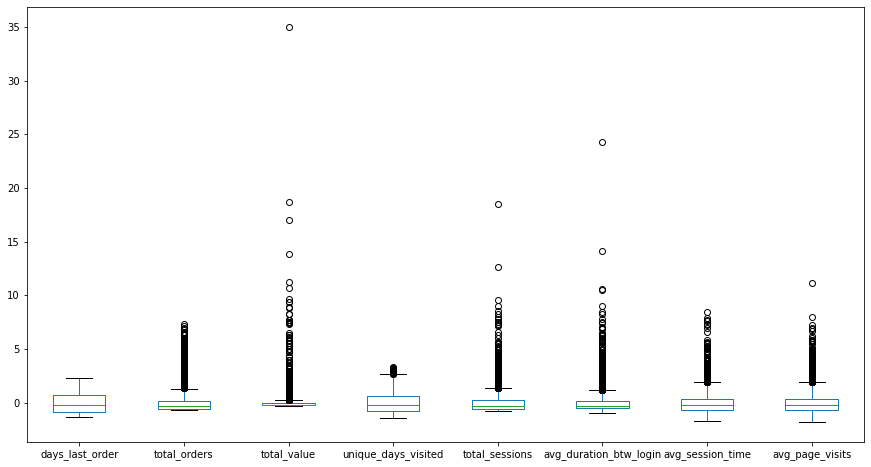

In [86]:
import matplotlib.pyplot as plt

d = pd.DataFrame(d, columns = df.columns[:-1])
d.plot( kind='box', figsize=(15,8))

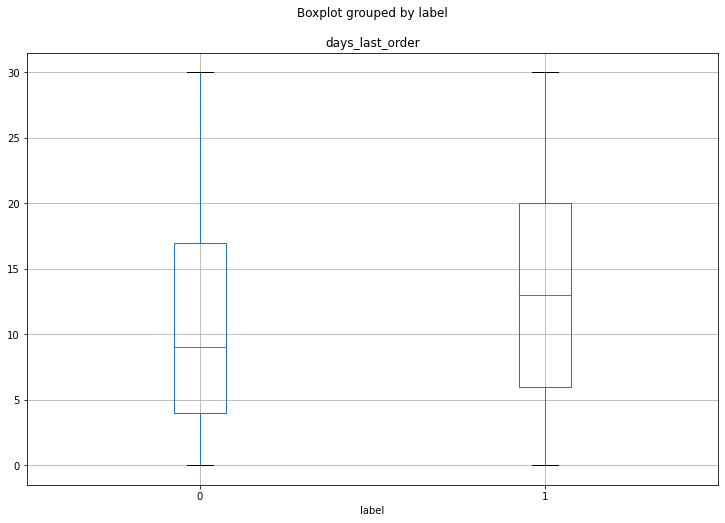

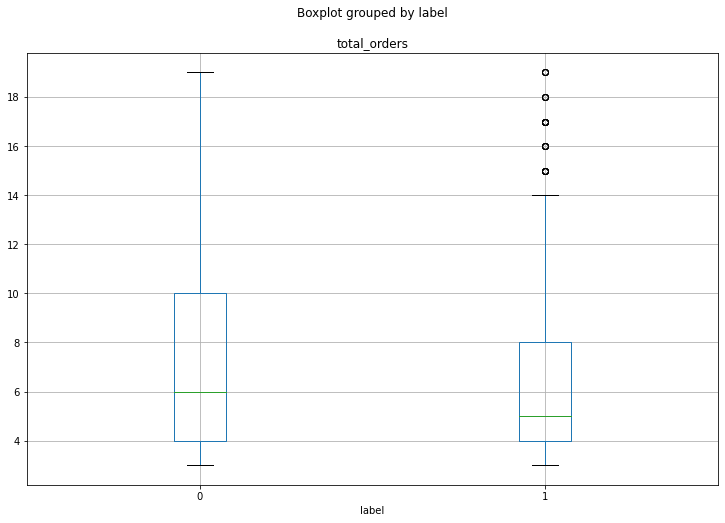

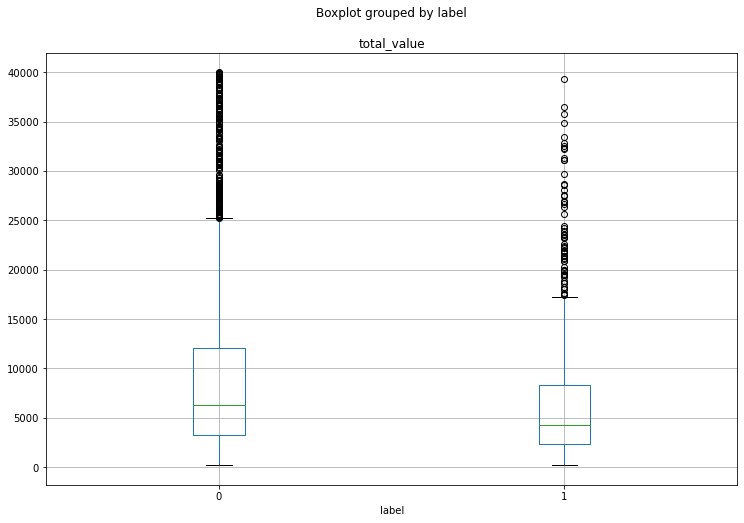

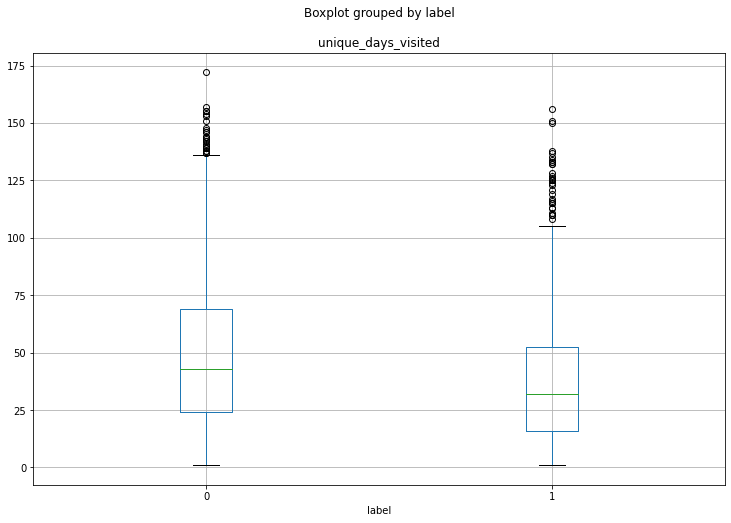

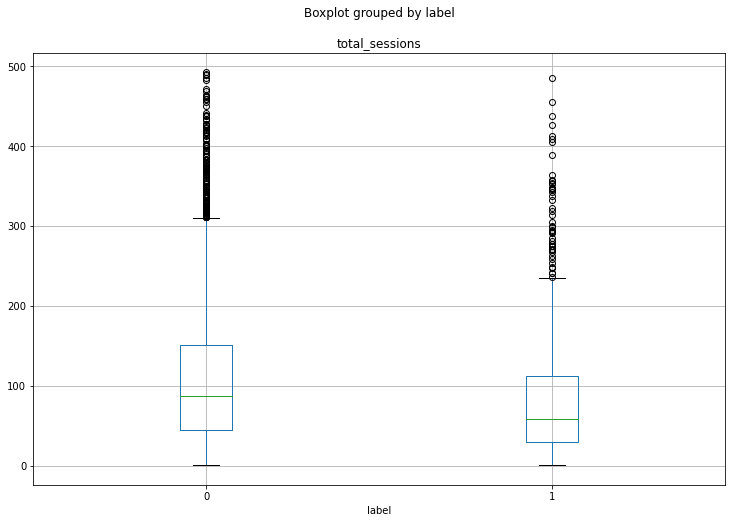

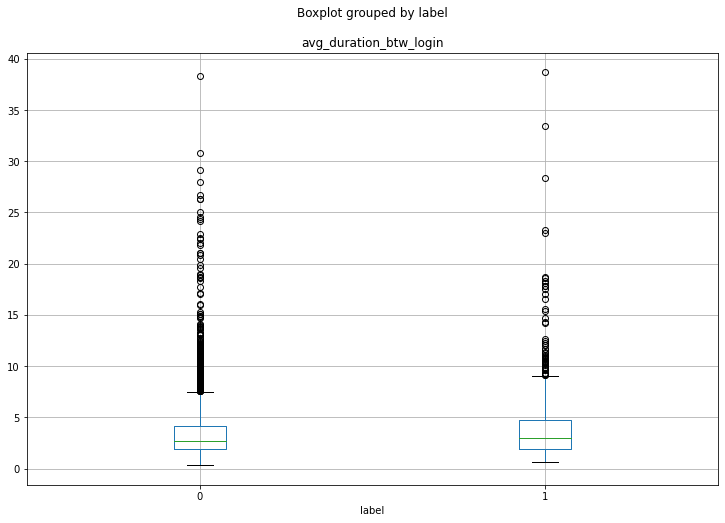

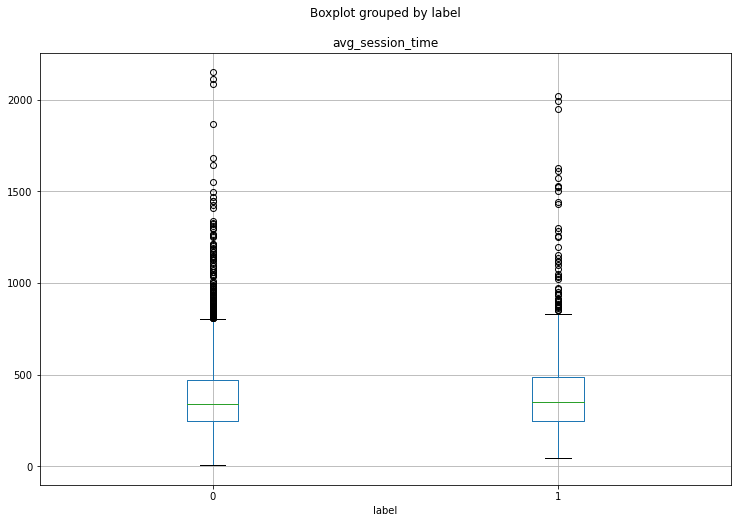

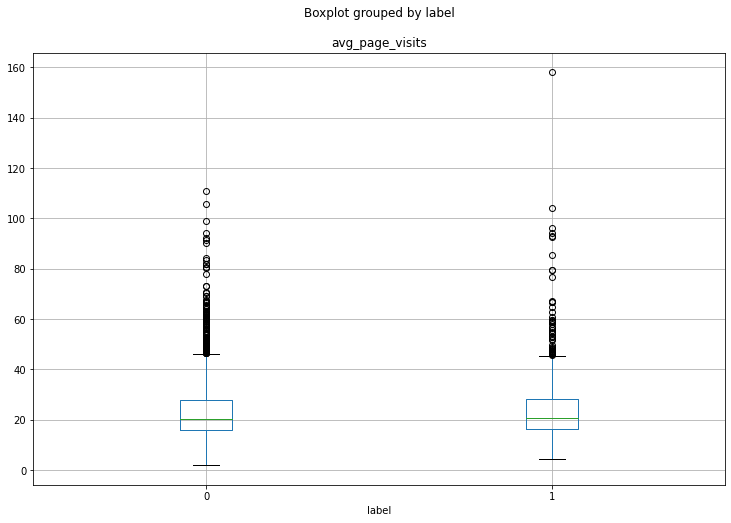

In [59]:
for col in df.columns[:-1]:
    df.boxplot(col, by='label', figsize=(12, 8))

In [5]:
print(df.shape)
# we only loose 100 obs by removing outliers

(3824, 9)


In [6]:
from scipy.stats import kruskal

for col in df.columns[:-1]:
    x_0 = df[df['label']==0][col]
    x_1 = df[df['label']==1][col]
    stat, p = kruskal(x_0, x_1)
    print("{} :: Statistics {}, p = {}, Reject H0: {}".format(col, stat, p, p<=0.05))

days_last_order :: Statistics 62.86938600265177, p = 2.20878853463925e-15, Reject H0: True
total_orders :: Statistics 102.72190055973208, p = 3.856573836163933e-24, Reject H0: True
total_value :: Statistics 97.26807893887606, p = 6.054863046011741e-23, Reject H0: True
unique_days_visited :: Statistics 85.7154495125, p = 2.0778316290600068e-20, Reject H0: True
total_sessions :: Statistics 91.36779185937685, p = 1.193025875675026e-21, Reject H0: True
avg_duration_btw_login :: Statistics 6.900018045560209, p = 0.008619487956909479, Reject H0: True
avg_session_time :: Statistics 1.2388013322478073, p = 0.2657021914341856, Reject H0: False
avg_page_visits :: Statistics 0.626778431654163, p = 0.4285394745394998, Reject H0: False


In [35]:
df.columns

Index(['days_last_order', 'total_orders', 'total_value', 'unique_days_visited',
       'total_sessions', 'avg_duration_btw_login', 'avg_session_time',
       'avg_page_visits', 'label'],
      dtype='object')

In [42]:
cols = ['days_last_order', 'total_orders', 'total_value', 'unique_days_visited',
       'total_sessions', 'avg_duration_btw_login', 'avg_session_time',
       'avg_page_visits']

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc

X_train, X_test, y_train, y_test = train_test_split(df[cols].values, df['label'].values, test_size = 0.30, random_state = 123)

y_train = y_train.ravel()
y_test = y_test.ravel()

print("Training dataset shape: {}, {}".format(X_train.shape, y_train.shape))
print("Testing dataset shape: {}, {}".format(X_test.shape, y_test.shape))

Training dataset shape: (2676, 8), (2676,)
Testing dataset shape: (1148, 8), (1148,)


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [47]:
def predict(X_train, y_train, X_test, y_test):
    y_train_pred = clf.predict(X_train)
    print("Training accuracy on all features: {:.3f}".format(acc(y_train, y_train_pred)))

    y_test_pred = clf.predict(X_test)
    print("Training accuracy on all features: {:.3f}".format(acc(y_test, y_test_pred)))

In [9]:
cols = [x for x in range(6)]
cols

[0, 1, 2, 3, 4, 5]

In [46]:
clf = RandomForestClassifier(n_estimators=100,  max_depth=10)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
print("Training accuracy on all features: {:.3f}".format(acc(y_train, y_train_pred)))

y_test_pred = clf.predict(X_test)
print("Training accuracy on all features: {:.3f}".format(acc(y_test, y_test_pred)))

Training accuracy on all features: 0.856
Training accuracy on all features: 0.764


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

clf = RandomForestClassifier(n_estimators=100, n_jobs= -1, random_state= 123)
sfs1 = sfs(clf, k_features= 4, forward= True, floating= False, verbose= 2, scoring= 'accuracy', cv = 5, n_jobs = 1)
sfs1 = sfs1.fit(X_train, y_train)

In [60]:
%%time
from sklearn.metrics import accuracy_score
import xgboost as xgb

train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)
prev = 0
for depth in range(8):
    for eta in range(30):
        for epoch in range(20):
            param = {
                'max_depth': depth+1,
                'eta': (eta+1)/10,
                'objective': 'multi:softmax',
                'num_class': 3} 
            epochs = epoch 
            model = xgb.train(param, train, epochs)
            predictions = model.predict(test)
            acc = accuracy_score(y_test, predictions)*100
            #if epoch%5 == 0: print('.',end='')
            if prev<acc:
                prev = acc
                #print()
                print("depth={}, eta={}, epochs={}, acc={}".format(depth+1,(eta+1)/100,epoch,acc))
print('Done')

depth=1, eta=0.01, epochs=0, acc=76.21951219512195
depth=3, eta=0.05, epochs=17, acc=76.30662020905923
depth=3, eta=0.12, epochs=17, acc=76.39372822299651
depth=3, eta=0.2, epochs=18, acc=76.4808362369338
depth=4, eta=0.16, epochs=12, acc=76.56794425087108
depth=5, eta=0.22, epochs=11, acc=76.65505226480836
depth=5, eta=0.22, epochs=15, acc=76.74216027874564
depth=6, eta=0.13, epochs=14, acc=76.82926829268293
depth=6, eta=0.13, epochs=17, acc=76.91637630662021
depth=6, eta=0.24, epochs=11, acc=77.17770034843205
depth=6, eta=0.24, epochs=12, acc=77.26480836236934
Done
Wall time: 2min 11s
